In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.linalg import expm
import math
from scipy.stats import multivariate_normal

In [3]:
def particleFilterPropogate(tInit, xInit, wheelSpeeds, nextTime, radius, width, variance1, variance2):
    '''
    A function to estimate the state of robot at nextTime (t+1).

        Parameters:
            tInit (int): Start time t
            xInit (list): Prior belief over the initial state of the robot
            wheelSpeeds (list): Wheel speeds of our robot
            nextTime (int): End time t+1
            radius (float): Radius of the wheel
            width (float): Width of the wheel
            variance1 (float): Assumed variance of left wheel speed
            variance2 (float): Assumed variance of right wheel speed
        Returns:
            xNext (list): Estimated belief of the state of the robot at time nextTime (t+1) after applying control
    '''
    
    xNext = []
    nextTime = nextTime - tInit
    for x in xInit:
        x = np.array(x)
        velocityLeft = wheelSpeeds[0] + np.random.normal(0,variance1)
        velocityRight = wheelSpeeds[1] + np.random.normal(0,variance2)


        # Motion model of the differential drive robot
        omega = [[0, -(radius/width)*(velocityRight - velocityLeft), (radius/2)*(velocityRight + velocityLeft)],
                 [(radius/width)*(velocityRight - velocityLeft), 0, 0],
                 [0,0,0]
                ]
        
        omega = np.array(omega)
        u = nextTime * omega
        u = np.array(u)
        u = expm(u)
        u = np.array(u)
        
        # Estimating the state of robot at time t+1
        xNext.append(np.matmul(x,u))
    
    return xNext

In [5]:
def particleFilterUpdate(xPrior, z, varianceP):
    '''
    A function to estimate the posterior state of robot after incorporating measurement z at time t.

        Parameters:
            xPrior (list): Prior belief of the state of the robot at time t after applying control
            z (list): Measurement of robot state at timt t
            varianceP (float): Assumed variance robot state
        Returns:
            xPosterior (list): Estimated belief of the state of the robot after applying control and incorporating measurement z at time t
    '''

    weight = []
    z = np.array([[z[0]],[z[1]]])
    xPosterior = []
    I = [[1,0],
        [0,1]]
    I = np.array(I)

    coV = (varianceP**1) * I
    coV = np.array(coV)
    incoV = np.linalg.inv(coV)

    # Calculating the likelyhood function p(zt|xt) -> the likelyhood that robot is at a state xt given a measurement at time t.
    for x in xPrior:
        lt = np.array([[x[0][2]],[x[1][2]]])        
        error = np.subtract(z,lt)
        product = np.matmul(np.transpose(error),incoV)
        product = np.matmul(product,error)
        product = product[0][0]
        product = - product / 2
        expOfProduct = math.exp(product)
        
        det = 2*math.pi*coV
        det = np.linalg.det(det)
        det = math.sqrt(det)
        weight.append(expOfProduct/det)
    
    # Estimating the state of the robot at time t given measurement zt
    xPosterior = random.choices(xPrior,k = len(xPrior), weights = weight)

    return xPosterior
        

Using the particle filter propagation function, generate N = 1000 realizations of x10 (the pose of the robot at time t = 10) from p(x10|x0, φ˙ l, φ˙ r, r,w, σl, σr), assuming that x0 = (0, I2) ∈ SE(2) (i.e. that the robot starts at the origin at time t = 0).

In [6]:
x0 = [[1,0,0],
      [0,1,0],
      [0,0,1],
      ]

xInit = []

for i in range(1000):
      xInit.append(x0)


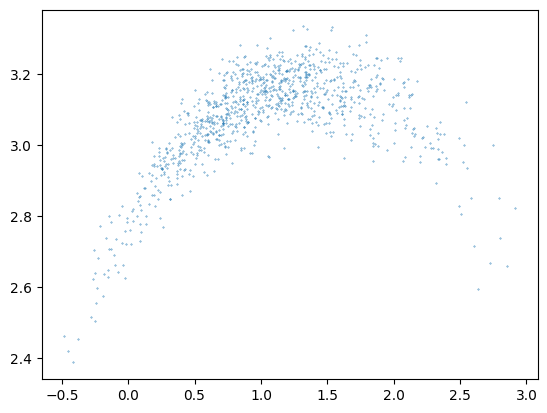

In [7]:
currentTime = 0
wheelSpeeds = [1.5, 2]
nextTime = 10
radius = 0.25
width = 0.5
variance1 = 0.05
variance2 = 0.05

xPrior = particleFilterPropogate(currentTime, xInit, wheelSpeeds, nextTime, radius, width, variance1, variance2)

y1 = []
y2 = []
for x in xPrior:
    y1.append(x[0][2])
    y2.append(x[1][2])

plt.scatter(y1,y2,s=0.1)
plt.show()

Starting with an initial particle set X0 consisting of N = 1000 copies of I = (0, I2) ∈ SE(2) (indicating absolute certainty that the robot’s initial pose x0 is the origin), apply particle filter propagation function from part (c) to recursively generate sample-based approximations to the robot’s belief over its pose xt ∈ SE(2) at times t ∈ {5, 10, 15, 20}.

var1 =  [0.01759657 0.01433387] 
var2 =  [0.23260534 0.01322948] 
var3 =  [0.25281467 0.33064326] 
var4 =  [0.22868924 0.58454608]


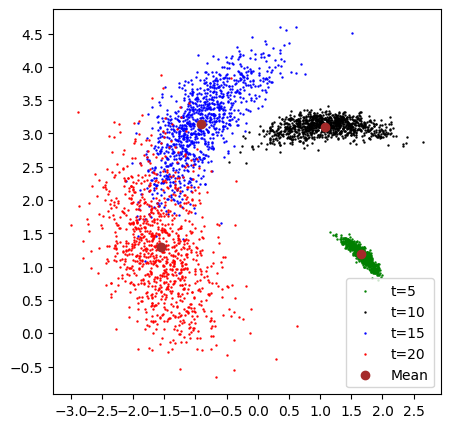

In [8]:
xPrior1 = particleFilterPropogate(0,xInit, wheelSpeeds, 5, radius, width, variance1, variance2)
xPrior2 = particleFilterPropogate(5,xPrior1, wheelSpeeds, 10, radius, width, variance1, variance2)
xPrior3 = particleFilterPropogate(10,xPrior2, wheelSpeeds, 15, radius, width, variance1, variance2)
xPrior4 = particleFilterPropogate(15,xPrior3, wheelSpeeds, 20, radius, width, variance1, variance2)


a1 = []
b1 = []
c1 = []
d1 = []
for x in xPrior1:
    a1.append([x[0][2],x[1][2]])
for x in xPrior2:
    b1.append([x[0][2],x[1][2]])
for x in xPrior3:
    c1.append([x[0][2],x[1][2]])
for x in xPrior4:
    d1.append([x[0][2],x[1][2]])


a1 = np.array(a1)
b1 = np.array(b1)
c1 = np.array(c1)
d1 = np.array(d1)

x1Mean = np.mean(a1,axis=0)
x2Mean = np.mean(b1,axis=0)
x3Mean = np.mean(c1,axis=0)
x4Mean = np.mean(d1,axis=0)

x1Var = np.var(a1,axis=0)
x2Var = np.var(b1,axis=0)
x3Var = np.var(c1,axis=0)
x4Var = np.var(d1,axis=0)

print("var1 = ", x1Var,"\nvar2 = ",x2Var,"\nvar3 = ",x3Var,"\nvar4 = ",x4Var)

plt.figure(figsize = (5,5))
plt.xticks(np.arange(-3,3,0.5))
plt.yticks(np.arange(-3,5,0.5))


plt.scatter(a1[:,0],a1[:,1],s=0.5,c='green')
plt.scatter(b1[:,0],b1[:,1],s=0.5,c='black')
plt.scatter(c1[:,0],c1[:,1],s=0.5,c='blue')
plt.scatter(d1[:,0],d1[:,1],s=0.5,c='red')

plt.scatter(x1Mean[0],x1Mean[1],c="brown")
plt.scatter(x2Mean[0],x2Mean[1],c="brown")
plt.scatter(x3Mean[0],x3Mean[1],c="brown")
plt.scatter(x4Mean[0],x4Mean[1],c="brown")

plt.legend(['t=5','t=10','t=15','t=20',"Mean"])

plt.show()


Staring with an initial particle set X0 containing N = 1000 copies of I = (0, I2) ∈ SE(2) (indicating absolute certainty that the robot’s initial pose x0 is the origin), apply your particle filter propagation and update functions from parts (c) and (d) to recursively generate sample-based approximations of the robot’s posterior beliefs over its pose xt ∈ SE(2) at times t ∈ {5, 10, 15, 20} obtained after incorporating the sequence of measurements:

var1 =  [0.01468834 0.01155127] 
var2 =  [0.07074083 0.00889337] 
var3 =  [0.03972388 0.06219652] 
var4 =  [0.05440109 0.05444479]


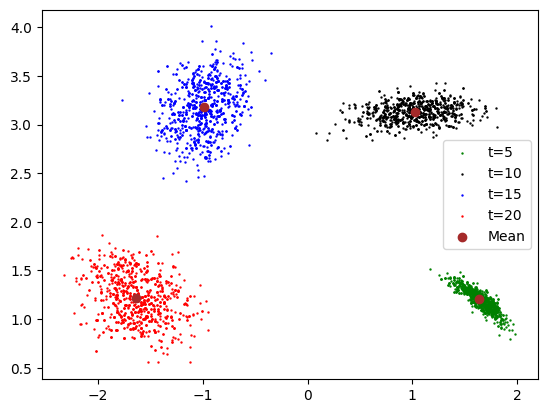

In [9]:
z5 = [1.6561,1.2847]
z10 = [1.0505,3.1059]
z15 = [-0.9875,3.2118]
z20 = [-1.6450,1.1978]
varianceP = 0.10

x1_after = particleFilterUpdate(xPrior1, z5, varianceP)

xPrior2 = particleFilterPropogate(5,x1_after, wheelSpeeds, 10, radius, width, variance1, variance2)
x2_after = particleFilterUpdate(xPrior2, z10, varianceP)

xPrior3 = particleFilterPropogate(10,x2_after, wheelSpeeds, 15, radius, width, variance1, variance2)
x3_after = particleFilterUpdate(xPrior3, z15, varianceP)

xPrior4 = particleFilterPropogate(15,x3_after, wheelSpeeds, 20, radius, width, variance1, variance2)
x4_after = particleFilterUpdate(xPrior4, z20, varianceP)

a2 = []
b2 = []
c2 = []
d2 = []

for x in x1_after:
    a2.append([x[0][2],x[1][2]])
for x in x2_after:
    b2.append([x[0][2],x[1][2]])
for x in x3_after:
    c2.append([x[0][2],x[1][2]])
for x in x4_after:
    d2.append([x[0][2],x[1][2]])


a2 = np.array(a2)
b2 = np.array(b2)
c2 = np.array(c2)
d2 = np.array(d2)

x1Mean = np.mean(a2,axis=0)
x2Mean = np.mean(b2,axis=0)
x3Mean = np.mean(c2,axis=0)
x4Mean = np.mean(d2,axis=0)

x1Var = np.var(a2,axis=0)
x2Var = np.var(b2,axis=0)
x3Var = np.var(c2,axis=0)
x4Var = np.var(d2,axis=0)

print("var1 = ", x1Var,"\nvar2 = ",x2Var,"\nvar3 = ",x3Var,"\nvar4 = ",x4Var)

plt.scatter(a2[:,0],a2[:,1],s=0.5,c='green')
plt.scatter(b2[:,0],b2[:,1],s=0.5,c='black')
plt.scatter(c2[:,0],c2[:,1],s=0.5,c='blue')
plt.scatter(d2[:,0],d2[:,1],s=0.5,c='red')

plt.scatter(x1Mean[0],x1Mean[1],c="brown")
plt.scatter(x2Mean[0],x2Mean[1],c="brown")
plt.scatter(x3Mean[0],x3Mean[1],c="brown")
plt.scatter(x4Mean[0],x4Mean[1],c="brown")

plt.legend(['t=5','t=10','t=15','t=20',"Mean"])

plt.show()

